In [79]:
# libraries to import
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt, seaborn as sns
%matplotlib inline
color = sns.color_palette()
import warnings
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')
import missingno as msno # missing data visualization module for Python
import pandas_profiling
import gc
import datetime

In [80]:
#Read Csv
data = pd.read_csv('Ecommerce-UK-Retailer.csv', encoding= 'unicode_escape')
data.head()#Show top 5 rows

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

      InvoiceDate  UnitPrice  CustomerID         Country  
0  12/1/2010 8:26       2.55     17850.0  United Kingdom  
1  12/1/2010 8:26       3.39     17850.0  United Kingdom  
2  12/1/2010 8:26       2.75     17850.0  United Kingdom  
3  12/1/2010 8:26       3.39     17850.0  United Kingdom  
4  12/1/2010 8:26       3.39     17850.0  United Kingdom

In [81]:
data.info()#data cleaning

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [82]:
# Check missing values in column 
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [83]:
# check out the rows with missing values
data[data.isnull().any(axis=1)].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

          InvoiceDate  UnitPrice  CustomerID         Country  
622   12/1/2010 11:52       0.00         NaN  United Kingdom  
1443  12/1/2010 14:32       2.51         NaN  United Kingdom  
1444  12/1/2010 14:32       2.51         NaN  United Kingdom  
1445  12/1/2010 14:32       0.85         NaN  United Kingdom  
1446  12/1/2010 14:32       1.66         NaN  United Kingdom

In [84]:
# change the invoice_date format - String to Timestamp format
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

In [85]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom

In [86]:
# NewData without missing values
new_data = data.dropna()

In [87]:
#Checking for missing values for each column 
new_data.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [88]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [89]:
#Convert the coloumns String to Int type 
new_data['CustomerID'] = new_data['CustomerID'].astype('int64')

In [90]:
new_data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom

In [91]:
new_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


In [92]:
new_data.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

In [93]:
new_data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55       17850  United Kingdom  
1      2010-12-01 08:26:00       3.39       17850  United Kingdom  
2      2010-12-01 08:26:00       2.75       17850  United Kingdom  
3      2010-12-01 08:26:00       3.39       17850  United Kingdom  
4      2010-12-01 08:26:00       3.39       17850  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85       12680          France  
541905 2011-12-09 12:50:00       2.10       12680          France  
541906 2011-12-09 12:50:00       4.15       12680          France  
541907 2011-12-09 12:50:00       4.15       12680          France  
541908 2011-12-09 12:50:00       4.95       12680          France  

[406829 rows x 8 columns]

# 1(a)

In [94]:
# Box plot
#Boxplot for all the numeric values 

Coloums = ['Quantity', 'UnitPrice', 'CustomerID']
sns.set(style="whitegrid")
sns.boxplot(data = data[Coloums],linewidth = 3.5,color="blue")

plt.show()

# 1(b)

<AxesSubplot:ylabel='Frequency'>

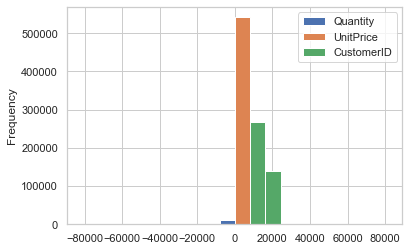

In [95]:
#Histogram for Numeric Variables

data[Coloums].plot.hist(bins=20)

# 1(c)

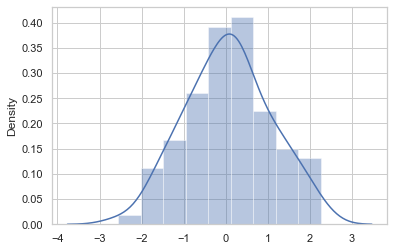

In [96]:
#Distribution Plot 

sns.set(style="whitegrid")

np.random.seed(0)
Coloums = np.random.randn(100)
ax = sns.distplot(Coloums)

# 1(d)

In [97]:
#Aggregation on the data
data.groupby('Country').UnitPrice.agg(['sum','mean','max','min'])

sum        mean       max       min
Country                                                           
Australia             4.054750e+03    3.220612    350.00      0.00
Austria               1.701520e+03    4.243192     40.00      0.12
Bahrain               8.657000e+01    4.556316     12.75      1.25
Belgium               7.540130e+03    3.644335     39.95      0.12
Brazil                1.426000e+02    4.456250     10.95      0.85
Canada                9.105800e+02    6.030331    550.94      0.10
Channel Islands       3.738550e+03    4.932124    293.00      0.19
Cyprus                3.920070e+03    6.302363    320.69      0.12
Czech Republic        8.815000e+01    2.938333     40.00      0.29
Denmark               1.266950e+03    3.256941     18.00      0.21
EIRE                  4.844719e+04    5.911077   1917.00      0.00
European Community    2.940500e+02    4.820492     18.00      0.55
Finland               3.786850e+03    5.448705    275.60      0.12
France                4.303199e+04    5.028864   4161.06      0.00
Germany               3.766600e+04    3.966930    599.50      0.00
Greece                7.132900e+02    4.885548     50.00      0.14
Hong Kong             1.224150e+04   42.505208   2653.95      0.21
Iceland               4.812100e+02    2.644011     12.75      0.25
Israel                1.079040e+03    3.633131    125.00      0.06
Italy                 3.879390e+03    4.831121    300.00      0.12
Japan                 8.148600e+02    2.276145     45.57      0.21
Lebanon               2.424400e+02    5.387556     14.95      0.55
Lithuania             9.944000e+01    2.841143      5.95      1.25
Malta                 6.660100e+02    5.244173     65.00      0.19
Netherlands           6.492550e+03    2.738317    206.40      0.00
Norway                6.529060e+03    6.012026    700.00      0.00
Poland                1.422270e+03    4.170880     40.00      0.19
Portugal              1.303754e+04    8.582976   1241.98      0.12
RSA                   2.481000e+02    4.277586     14.95      0.00
Saudi Arabia          2.411000e+01    2.411000      5.49      0.42
Singapore             2.510889e+04  109.645808   3949.32      0.19
Spain                 1.263345e+04    4.987544   1715.85      0.00
Sweden                1.806830e+03    3.910887     40.00      0.19
Switzerland           6.813690e+03    3.403442     40.00      0.00
USA                   6.449800e+02    2.216426     16.95      0.42
United Arab Emirates  2.298900e+02    3.380735     37.50      0.29
United Kingdom        2.245715e+06    4.532422  38970.00 -11062.06
Unspecified           1.204010e+03    2.699574     16.95      0.19

# 1(e)

In [98]:
#Unique Values
data.CustomerID.unique()
data.UnitPrice.unique()
data.Quantity.unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

In [99]:
# Getting number of unique values
data.CustomerID.nunique()
data.UnitPrice.nunique()
data.Quantity.nunique()

722

In [100]:
#Getting distinct values
data.value_counts()

InvoiceNo  StockCode  Description                          Quantity  InvoiceDate          UnitPrice  CustomerID  Country       
555524     22698      PINK REGENCY TEACUP AND SAUCER       1         2011-06-05 11:37:00  2.95       16923.0     United Kingdom    20
           22697      GREEN REGENCY TEACUP AND SAUCER      1         2011-06-05 11:37:00  2.95       16923.0     United Kingdom    12
572861     22775      PURPLE DRAWERKNOB ACRYLIC EDWARDIAN  12        2011-10-26 12:46:00  1.25       14102.0     United Kingdom     8
541266     21755      LOVE BUILDING BLOCK WORD             1         2011-01-16 16:25:00  5.95       15673.0     United Kingdom     6
540524     21756      BATH BUILDING BLOCK WORD             1         2011-01-09 12:53:00  5.95       16735.0     United Kingdom     6
                                                                                                                                   ..
569360     22725      ALARM CLOCK BAKELIKE CHOCOLATE       1        

In [101]:
data.CustomerID.value_counts(dropna=False)


NaN        135080
17841.0      7983
14911.0      5903
14096.0      5128
12748.0      4642
            ...  
16148.0         1
16144.0         1
16138.0         1
16093.0         1
17948.0         1
Name: CustomerID, Length: 4373, dtype: int64

# 1(f)

In [102]:
#Finding Duplicate values
data.duplicated()

0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool

In [103]:
data.duplicated().sum

<bound method Series.sum of 0         False
1         False
2         False
3         False
4         False
          ...  
541904    False
541905    False
541906    False
541907    False
541908    False
Length: 541909, dtype: bool>

In [104]:
data.duplicated().head()

0    False
1    False
2    False
3    False
4    False
dtype: bool

In [105]:
data.shape

(541909, 8)

In [106]:
data.drop_duplicates().shape

(536641, 8)

# 1(g)

In [116]:
#Correlation of Heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap= "Blues")

<AxesSubplot:>

<AxesSubplot:>

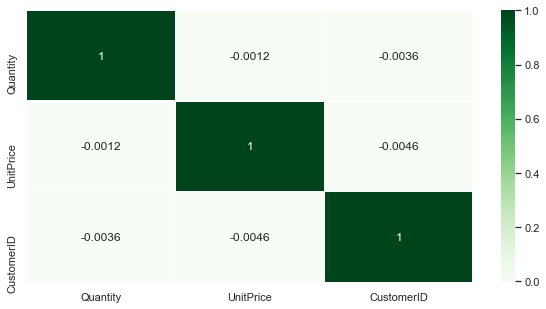

In [113]:
#Correlation of Heatmap 
plt.figure(figsize=(10,5))
sns.heatmap(data.corr(), annot = True, linewidth = 0.5, cmap='Greens')

# 1(h)

In [25]:
#Regression Plot 
plt.figure(figsize=(10,5))
sns.regplot(data=data, x='Quantity', y='CustomerID')

<AxesSubplot:xlabel='Quantity', ylabel='CustomerID'>

<AxesSubplot:xlabel='UnitPrice', ylabel='Quantity'>

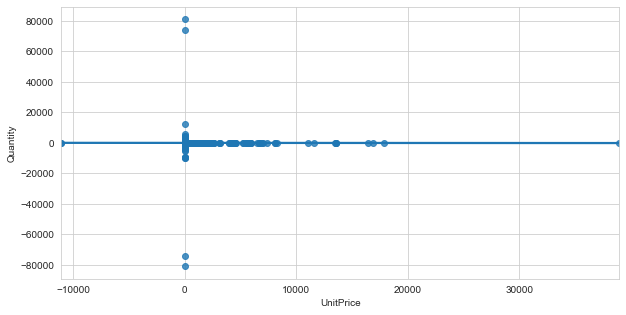

In [26]:
#Regression Plot 
plt.figure(figsize=(10,5))
sns.regplot(data=data, x='UnitPrice', y='Quantity')

# 1(i)

<AxesSubplot:xlabel='Country', ylabel='Quantity'>

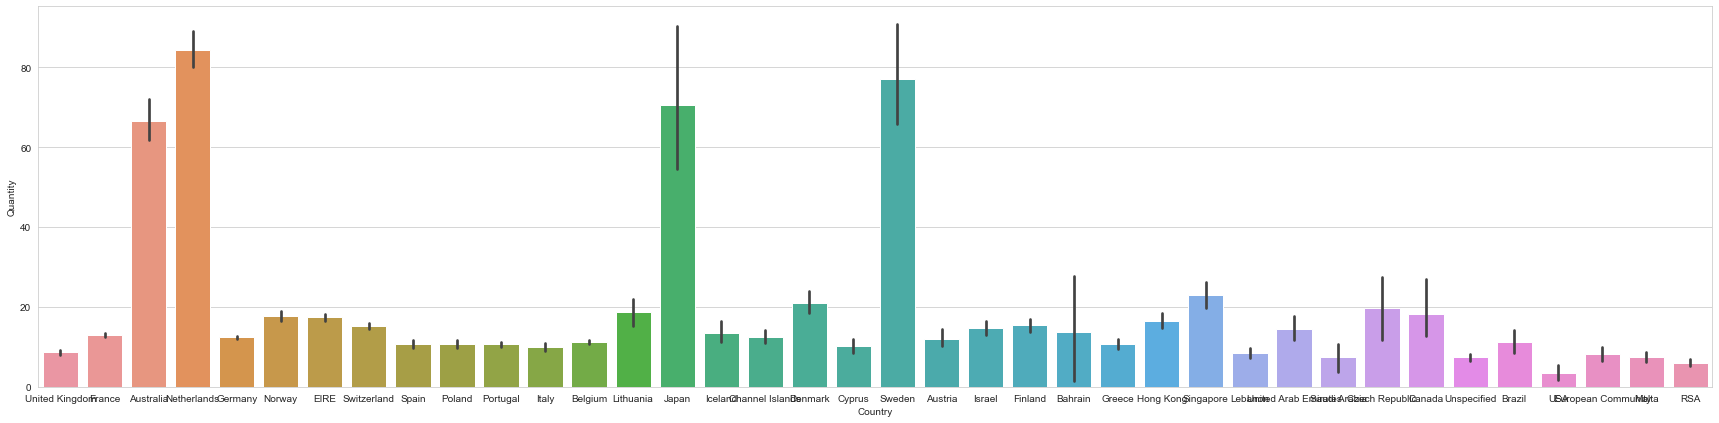

In [27]:
#Bar Plot
plt.figure(figsize=(30,7))
sns.barplot(x="Country", y="Quantity", data=data)

# 1(j)

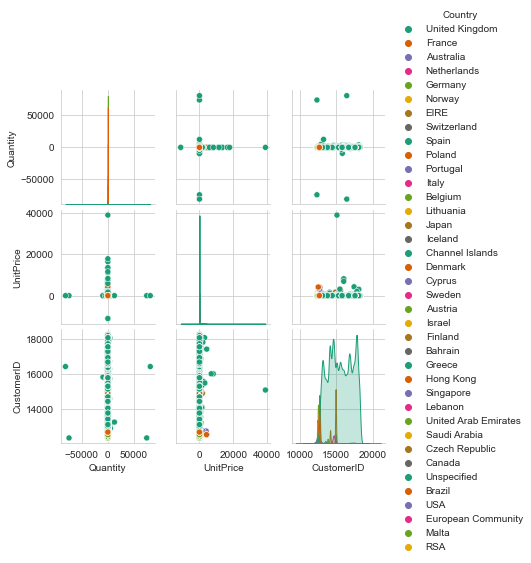

In [28]:
#PairPlot relationship of components on the data
sns.pairplot(data,hue='Country', palette= 'Dark2', diag_kind='kde',size=1.85)

In [ ]:
sns.pairplot(data, vars=['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','CustomerID','Country'], kind='reg')
plt.show()

In [ ]:
sns.pairplot(data)

# 1(k)

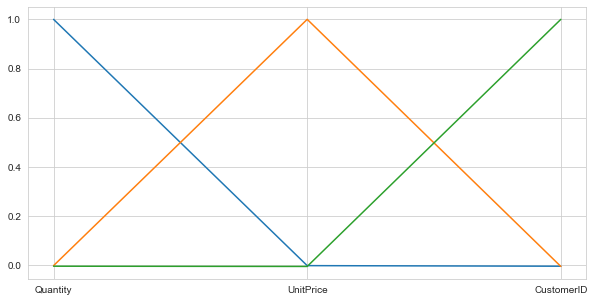

In [29]:
#LineChart
plt.figure(figsize=(10,5))
plt.plot(data.corr())

# 1(l)

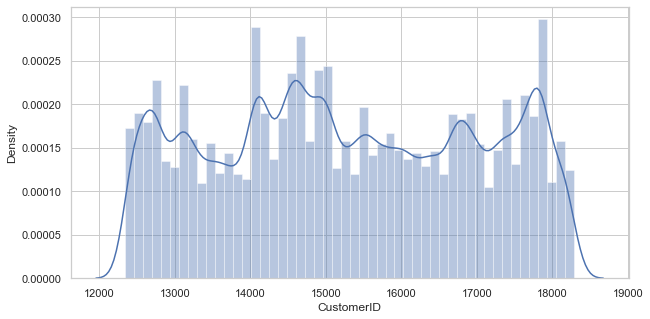

This is the skewness of the distribution is 0.02983499005167725
This is the Median of distribution 15152.0 is greater than mean 15287.690570239585 of this distribution


In [115]:
#the skewness Plot
plt.figure(figsize=(10,5))
sns.distplot(data['CustomerID'])
plt.show()
print('This is the skewness of the distribution is',data['CustomerID'].skew())
print('This is the Median of distribution {} is greater than mean {} of this distribution'.format(data.CustomerID.median(),data.CustomerID.mean()))



# 2


In [32]:
#Check coloumns with missing values
data.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
Country             0
UnitPrice           0
InvoiceDate         0
Quantity            0
StockCode           0
InvoiceNo           0
dtype: int64

In [33]:
#Check Rows with missing values
data[data.isnull().any(axis=1)].head()

InvoiceNo StockCode                      Description  Quantity  \
622     536414     22139                              NaN        56   
1443    536544     21773  DECORATIVE ROSE BATHROOM BOTTLE         1   
1444    536544     21774  DECORATIVE CATS BATHROOM BOTTLE         2   
1445    536544     21786               POLKADOT RAIN HAT          4   
1446    536544     21787            RAIN PONCHO RETROSPOT         2   

             InvoiceDate  UnitPrice  CustomerID         Country  
622  2010-12-01 11:52:00       0.00         NaN  United Kingdom  
1443 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1444 2010-12-01 14:32:00       2.51         NaN  United Kingdom  
1445 2010-12-01 14:32:00       0.85         NaN  United Kingdom  
1446 2010-12-01 14:32:00       1.66         NaN  United Kingdom

In [34]:
#Soreted data without missing value
data_new = data.dropna()

In [35]:
#Verifying check the missing value 
data_new.isnull().sum().sort_values(ascending=False)

Country        0
CustomerID     0
UnitPrice      0
InvoiceDate    0
Quantity       0
Description    0
StockCode      0
InvoiceNo      0
dtype: int64

In [36]:
data_new.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.9+ MB


In [37]:
# change the InvoiceDate format - String to Timestamp format
data['InvoiceDate'] = pd.to_datetime(data.InvoiceDate, format='%m/%d/%Y %H:%M')

In [38]:
#repalcing with numeric values
data_new['CustomerID'] = data_new['CustomerID'].astype('int64')

In [39]:
data_new.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  
0 2010-12-01 08:26:00       2.55       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39       17850  United Kingdom

In [40]:
data_new.describe()

Quantity      UnitPrice     CustomerID
count  406829.000000  406829.000000  406829.000000
mean       12.061303       3.460471   15287.690570
std       248.693370      69.315162    1713.600303
min    -80995.000000       0.000000   12346.000000
25%         2.000000       1.250000   13953.000000
50%         5.000000       1.950000   15152.000000
75%        12.000000       3.750000   16791.000000
max     80995.000000   38970.000000   18287.000000

# 3

In [41]:
pd.Series.unique

<function pandas.core.series.Series.unique(self)>

In [42]:
print (pd.DataFrame(data.apply(pd.Series.unique, axis=1).tolist()))

             0       1                                    2   3  \
0       536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER   6   
1       536365   71053                  WHITE METAL LANTERN   6   
2       536365  84406B       CREAM CUPID HEARTS COAT HANGER   8   
3       536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE   6   
4       536365  84029E       RED WOOLLY HOTTIE WHITE HEART.   6   
...        ...     ...                                  ...  ..   
541904  581587   22613          PACK OF 20 SPACEBOY NAPKINS  12   
541905  581587   22899         CHILDREN'S APRON DOLLY GIRL    6   
541906  581587   23254        CHILDRENS CUTLERY DOLLY GIRL    4   
541907  581587   23255      CHILDRENS CUTLERY CIRCUS PARADE   4   
541908  581587   22138        BAKING SET 9 PIECE RETROSPOT    3   

                         4     5      6               7  
0      2010-12-01 08:26:00  2.55  17850  United Kingdom  
1      2010-12-01 08:26:00  3.39  17850  United Kingdom  
2      2010-12-01 08:

In [43]:
duplicates = data.apply(pd.Series.duplicated, axis=1)
data.where(~duplicates, np.nan).apply(lambda x: pd.Series(sorted(x, key=pd.isnull)), axis=1)

0       1                                    2   3  \
0       536365  85123A   WHITE HANGING HEART T-LIGHT HOLDER   6   
1       536365   71053                  WHITE METAL LANTERN   6   
2       536365  84406B       CREAM CUPID HEARTS COAT HANGER   8   
3       536365  84029G  KNITTED UNION FLAG HOT WATER BOTTLE   6   
4       536365  84029E       RED WOOLLY HOTTIE WHITE HEART.   6   
...        ...     ...                                  ...  ..   
541904  581587   22613          PACK OF 20 SPACEBOY NAPKINS  12   
541905  581587   22899         CHILDREN'S APRON DOLLY GIRL    6   
541906  581587   23254        CHILDRENS CUTLERY DOLLY GIRL    4   
541907  581587   23255      CHILDRENS CUTLERY CIRCUS PARADE   4   
541908  581587   22138        BAKING SET 9 PIECE RETROSPOT    3   

                          4     5      6               7  
0       2010-12-01 08:26:00  2.55  17850  United Kingdom  
1       2010-12-01 08:26:00  3.39  17850  United Kingdom  
2       2010-12-01 08:26:00  2.75  17850  United Kingdom  
3       2010-12-01 08:26:00  3.39  17850  United Kingdom  
4       2010-12-01 08:26:00  3.39  17850  United Kingdom  
...                     ...   ...    ...             ...  
541904  2011-12-09 12:50:00  0.85  12680          France  
541905  2011-12-09 12:50:00   2.1  12680          France  
541906  2011-12-09 12:50:00  4.15  12680          France  
541907  2011-12-09 12:50:00  4.15  12680          France  
541908  2011-12-09 12:50:00  4.95  12680          France  

[541909 rows x 8 columns]

# 4

In [44]:
# Remove rows with negative values in Quantity
data_new = data_new[data_new.Quantity > 0]

In [45]:
data_new.describe()

Quantity      UnitPrice     CustomerID
count  397924.000000  397924.000000  397924.000000
mean       13.021823       3.116174   15294.315171
std       180.420210      22.096788    1713.169877
min         1.000000       0.000000   12346.000000
25%         2.000000       1.250000   13969.000000
50%         6.000000       1.950000   15159.000000
75%        12.000000       3.750000   16795.000000
max     80995.000000    8142.750000   18287.000000

# 5

In [46]:
#Adding coloums Month, Day and Hour for the invoice 
#Adding invoice data colomns
data_new['TotalAmount'] = data_new['Quantity'] * data_new['UnitPrice']

In [47]:
#Arranging all the columns
data_new = data_new[['InvoiceNo','StockCode','Description','Quantity','InvoiceDate','UnitPrice','TotalAmount','CustomerID','Country']]

In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [49]:
#convert the data time

In [50]:
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [51]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate']

0        2010-12-01 08:26:00
1        2010-12-01 08:26:00
2        2010-12-01 08:26:00
3        2010-12-01 08:26:00
4        2010-12-01 08:26:00
                 ...        
541904   2011-12-09 12:50:00
541905   2011-12-09 12:50:00
541906   2011-12-09 12:50:00
541907   2011-12-09 12:50:00
541908   2011-12-09 12:50:00
Name: InvoiceDate, Length: 541909, dtype: datetime64[ns]

In [52]:
#Etract the data
data['InvoiceDate'].dt.year

0         2010
1         2010
2         2010
3         2010
4         2010
          ... 
541904    2011
541905    2011
541906    2011
541907    2011
541908    2011
Name: InvoiceDate, Length: 541909, dtype: int64

In [53]:
data['InvoiceDate'].dt.month

0         12
1         12
2         12
3         12
4         12
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 541909, dtype: int64

In [54]:
data['InvoiceDate'].dt.day

0         1
1         1
2         1
3         1
4         1
         ..
541904    9
541905    9
541906    9
541907    9
541908    9
Name: InvoiceDate, Length: 541909, dtype: int64

In [55]:
data['InvoiceDate'].dt.hour

0          8
1          8
2          8
3          8
4          8
          ..
541904    12
541905    12
541906    12
541907    12
541908    12
Name: InvoiceDate, Length: 541909, dtype: int64

In [56]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  
...                    ...        ...         ...             ...  
541904 2011-12-09 12:50:00       0.85     12680.0          France  
541905 2011-12-09 12:50:00       2.10     12680.0          France  
541906 2011-12-09 12:50:00       4.15     12680.0          France  
541907 2011-12-09 12:50:00       4.15     12680.0          France  
541908 2011-12-09 12:50:00       4.95     12680.0          France  

[541909 rows x 8 columns]

In [57]:
data['Year'] = data['InvoiceDate'].dt.year
data['Month'] = data['InvoiceDate'].dt.month
data['Day'] = data['InvoiceDate'].dt.day
data['Hour'] = data['InvoiceDate'].dt.hour

In [58]:
data

InvoiceNo StockCode                          Description  Quantity  \
0         536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1         536365     71053                  WHITE METAL LANTERN         6   
2         536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3         536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4         536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   
...          ...       ...                                  ...       ...   
541904    581587     22613          PACK OF 20 SPACEBOY NAPKINS        12   
541905    581587     22899         CHILDREN'S APRON DOLLY GIRL          6   
541906    581587     23254        CHILDRENS CUTLERY DOLLY GIRL          4   
541907    581587     23255      CHILDRENS CUTLERY CIRCUS PARADE         4   
541908    581587     22138        BAKING SET 9 PIECE RETROSPOT          3   

               InvoiceDate  UnitPrice  CustomerID         Country  Year  \
0      2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010   
1      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
2      2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010   
3      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
4      2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010   
...                    ...        ...         ...             ...   ...   
541904 2011-12-09 12:50:00       0.85     12680.0          France  2011   
541905 2011-12-09 12:50:00       2.10     12680.0          France  2011   
541906 2011-12-09 12:50:00       4.15     12680.0          France  2011   
541907 2011-12-09 12:50:00       4.15     12680.0          France  2011   
541908 2011-12-09 12:50:00       4.95     12680.0          France  2011   

        Month  Day  Hour  
0          12    1     8  
1          12    1     8  
2          12    1     8  
3          12    1     8  
4          12    1     8  
...       ...  ...   ...  
541904     12    9    12  
541905     12    9    12  
541906     12    9    12  
541907     12    9    12  
541908     12    9    12  

[541909 rows x 12 columns]

# 6

In [59]:
 #Orders made by the customers
    
data_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count().head()

CustomerID         Country  InvoiceNo
0       12346  United Kingdom          1
1       12347         Iceland        182
2       12348         Finland         31
3       12349           Italy         73
4       12350          Norway         17

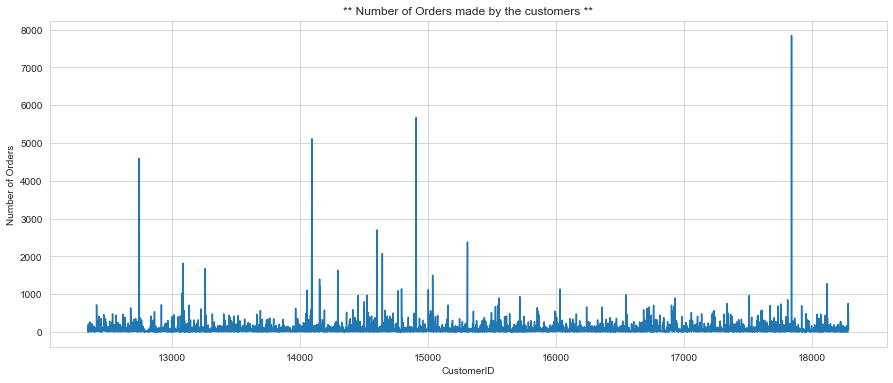

In [60]:
Orders = data_new.groupby(by=['CustomerID','Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(Orders.CustomerID, Orders.InvoiceNo)
plt.xlabel('CustomerID')
plt.ylabel('Number of Orders')
plt.title('** Number of Orders made by the customers **')
plt.show()

# 7

In [61]:
print('** The TOP 5 customers with their order numbers **')
Orders.sort_values(by='InvoiceNo', ascending=False).head()

** The TOP 5 customers with their order numbers **


CustomerID         Country  InvoiceNo
4019       17841  United Kingdom       7847
1888       14911            EIRE       5677
1298       14096  United Kingdom       5111
334        12748  United Kingdom       4596
1670       14606  United Kingdom       2700

# 8


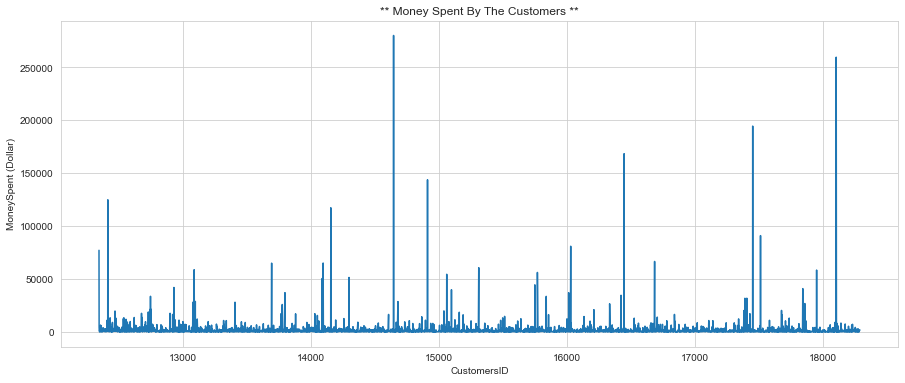

In [62]:
#Money spent by the customers
MoneySpent = data_new.groupby(by=['CustomerID','Country'], as_index=False)['TotalAmount'].sum()
plt.subplots(figsize=(15,6))
plt.plot(MoneySpent.CustomerID, MoneySpent.TotalAmount)
plt.xlabel('CustomersID')
plt.ylabel('MoneySpent (Dollar)')
plt.title('** Money Spent By The Customers **')
plt.show()



In [63]:
data.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Year  Month  \
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom  2010     12   
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom  2010     12   
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom  2010     12   

   Day  Hour  
0    1     8  
1    1     8  
2    1     8  
3    1     8  
4    1     8

# 9

In [64]:
#TOP 5 customers with highest money spent 
print('** The TOP 5 customers with highes money spent **')
MoneySpent.sort_values(by='TotalAmount', ascending=False).head()


** The TOP 5 customers with highes money spent **


CustomerID         Country  TotalAmount
1698       14646     Netherlands    280206.02
4210       18102  United Kingdom    259657.30
3737       17450  United Kingdom    194550.79
3017       16446  United Kingdom    168472.50
1888       14911            EIRE    143825.06

# 10

In [65]:
#Number Of orders per month
#Groupping the country wise order
Group_Orders_Per_Month = data.groupby('Country')['Month'].count().sort_values().head
data.Month.value_counts().sort_index()#Orders per Months

1     35147
2     27707
3     36748
4     29916
5     37030
6     36874
7     39518
8     35284
9     50226
10    60742
11    84711
12    68006
Name: Month, dtype: int64

# 11

In [66]:
#Number Of orders per Day
#Groupping the country wise order
Group_Orders_Per_Day = data.groupby('Country')['Day'].count().sort_values().head

In [67]:
data.Day.value_counts().sort_index()#Orders per day

1     17531
2     16729
3     14495
4     19617
5     22104
6     24182
7     22998
8     24658
9     18146
10    19946
11    18417
12    14136
13    18270
14    18085
15    15690
16    15603
17    22805
18    19129
19    13181
20    19173
21    19244
22    16137
23    17805
24    16888
25    16232
26    10563
27    15022
28    17265
29    11925
30    15415
31    10518
Name: Day, dtype: int64

# 12

In [68]:
#Number Of orders per Hour
#Groupping the country wise order
Group_Orders_Per_Hour = data.groupby('Country')['Hour'].count().sort_values().head

In [69]:
data.Hour.value_counts().sort_index()#Orders per hour

6        41
7       383
8      8909
9     34332
10    49037
11    57674
12    78709
13    72259
14    67471
15    77519
16    54516
17    28509
18     7974
19     3705
20      871
Name: Hour, dtype: int64

# 13

In [73]:
#Groupping the country wise order
Group_Country_Orders = data_new.groupby('Country')['InvoiceNo'].count().sort_values()


In [74]:
data_new.head()

InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  TotalAmount  CustomerID         Country  
0 2010-12-01 08:26:00       2.55        15.30       17850  United Kingdom  
1 2010-12-01 08:26:00       3.39        20.34       17850  United Kingdom  
2 2010-12-01 08:26:00       2.75        22.00       17850  United Kingdom  
3 2010-12-01 08:26:00       3.39        20.34       17850  United Kingdom  
4 2010-12-01 08:26:00       3.39        20.34       17850  United Kingdom

In [75]:
#For better Visiualization 
## plot number of unique customers in each country (with UK)
plt.subplots(figsize=(15,8))
Group_Country_Orders.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Number of Orders for different Countries', fontsize=12)
plt.show()

# 14

In [76]:
#Orders trend across months
data['Month']=data['InvoiceDate'].dt.month
plt.figure(figsize=(10,5))
plt.title('Orders trend across months ')
plt.xlabel('Month')
plt.ylabel('Country wise data')
plt.plot(data['Month'])
plt.show()



In [77]:
#Orders trend across months
data['InvoiceDate'].plot(figsize=(16,6))
plt.title('Orders trend across months')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Month')
plt.plot()
plt.show()

# 15

In [78]:
Group_Country_Amount_Spent = data_new.groupby('Country')['TotalAmount'].sum().sort_values()
# plot total money spent by each country (with UK)
plt.subplots(figsize=(15,8))
Group_Country_Amount_Spent.plot(kind='barh', fontsize=12, color=color[0])
plt.xlabel('Money Spent (Dollar)', fontsize=12)
plt.ylabel('Country', fontsize=12)
plt.title('Money Spent by different Countries', fontsize=12)
plt.show()